In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
data= pd.read_csv('/content/laptops.txt')
data.columns = ['Manufacturer','Model Name','Category','Screen Size','Screen','CPU','RAM', 'Storage','GPU','Operating System','Operating System Version','Weight','Price (Euros)']
print(data)


     Manufacturer                           Model Name            Category  \
0           Apple                          MacBook Pro           Ultrabook   
1           Apple                          Macbook Air           Ultrabook   
2              HP                               250 G6            Notebook   
3           Apple                          MacBook Pro           Ultrabook   
4           Apple                          MacBook Pro           Ultrabook   
...           ...                                  ...                 ...   
1298       Lenovo                       Yoga 500-14ISK  2 in 1 Convertible   
1299       Lenovo                       Yoga 900-13ISK  2 in 1 Convertible   
1300       Lenovo                   IdeaPad 100S-14IBR            Notebook   
1301           HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook   
1302         Asus  X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook   

     Screen Size                                      Screen  \

In [ ]:
data.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"


In [ ]:
data.tail()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,"14.0""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,10,1.8kg,"638,00"
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,"13.3""",IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows,10,1.3kg,"1499,00"
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,"14.0""",1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows,10,1.5kg,"229,00"
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,"15.6""",1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows,10,2.19kg,"764,00"
1302,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,"15.6""",1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows,10,2.2kg,"369,00"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Manufacturer              1303 non-null   object
 1   Model Name                1303 non-null   object
 2   Category                  1303 non-null   object
 3   Screen Size               1303 non-null   object
 4   Screen                    1303 non-null   object
 5   CPU                       1303 non-null   object
 6   RAM                       1303 non-null   object
 7   Storage                   1303 non-null   object
 8   GPU                       1303 non-null   object
 9   Operating System          1303 non-null   object
 10  Operating System Version  1133 non-null   object
 11  Weight                    1303 non-null   object
 12  Price (Euros)             1303 non-null   object
dtypes: object(13)
memory usage: 132.5+ KB


In [ ]:
data.shape

(1303, 13)

In [ ]:
data.isnull().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
Storage                       0
GPU                           0
Operating System              0
Operating System Version    170
Weight                        0
Price (Euros)                 0
dtype: int64

In [ ]:
data.describe()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
count,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1133,1303,1303
unique,19,618,6,18,40,118,9,38,110,7,4,179,791
top,Dell,XPS 13,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows,10,2.2kg,"1499,00"
freq,297,30,727,665,507,190,619,412,281,1125,1072,121,14


In [ ]:
data["Manufacturer"].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Manufacturer, dtype: int64

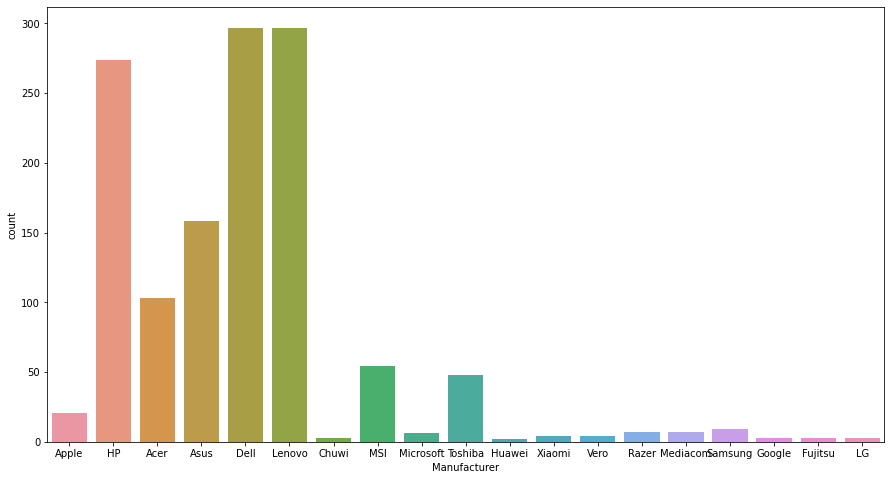

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x="Manufacturer",data=data)
plt.show()

In [ ]:
list=set(data["Manufacturer"])

In [ ]:
print(list)

{'Lenovo', 'Chuwi', 'HP', 'Fujitsu', 'Huawei', 'Razer', 'MSI', 'Acer', 'Apple', 'Dell', 'Samsung', 'Asus', 'Microsoft', 'Google', 'Mediacom', 'Toshiba', 'LG', 'Vero', 'Xiaomi'}


In [ ]:
list1=set(data["Category"])

In [ ]:
print(list1)

{'Netbook', 'Ultrabook', '2 in 1 Convertible', 'Workstation', 'Notebook', 'Gaming'}


In [ ]:
print("Competitors of HP are Dell & Lenovo")

Competitors of HP are Dell & Lenovo


In [ ]:
encoder=LabelEncoder()

In [ ]:
data['Manufacturer']=encoder.fit_transform(data['Manufacturer'])
data['Model Name']=encoder.fit_transform(data['Model Name'])
data['Category']=encoder.fit_transform(data['Category'])
data['Screen Size']=encoder.fit_transform(data['Screen Size'])
data['Screen']=encoder.fit_transform(data['Screen'])
data['CPU']=encoder.fit_transform(data['CPU'])
data['RAM']=encoder.fit_transform(data['RAM'])
data['Storage']=encoder.fit_transform(data['Storage'])
data['GPU']=encoder.fit_transform(data['GPU'])
data['Operating System']=encoder.fit_transform(data['Operating System'])
data['Operating System Version']=encoder.fit_transform(data['Operating System Version'])
data['Weight']=encoder.fit_transform(data['Weight'])
data['Price (Euros)']=encoder.fit_transform(data['Price (Euros)'])

In [ ]:
x=data.drop(columns='Manufacturer',axis=1)

In [ ]:
y=data['Manufacturer']

In [ ]:
print(x)

      Model Name  Category  Screen Size  Screen  CPU  RAM  Storage  GPU  \
0            300         4            7      23   65    8        2   58   
1            301         4            7       1   63    8        0   51   
2             50         3           14       8   74    8       15   53   
3            300         4           13      25   85    1       28    9   
4            300         4            7      23   67    8       15   59   
...          ...       ...          ...     ...  ...  ...      ...  ...   
1298         580         0           10      13   89    5        2   47   
1299         588         0            7      19   89    1       28   47   
1300         196         3           10       0   34    3       34   40   
1301           2         3           14       0   89    7        8   21   
1302         568         3           14       0   34    5       25   40   

      Operating System  Operating System Version  Weight  Price (Euros)  
0                    6   

In [ ]:
print(y)

0        1
1        1
2        7
3        1
4        1
        ..
1298    10
1299    10
1300    10
1301     7
1302     2
Name: Manufacturer, Length: 1303, dtype: int64


In [ ]:
X_train, X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=3)

In [ ]:
classifier.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
train_data_pred = classifier.predict(X_train)

In [ ]:
train_data_accuracy=accuracy_score(train_data_pred,Y_train)

In [ ]:
print('Accuracy on Training data : ', train_data_accuracy)

Accuracy on Training data :  0.8704414587332053


In [ ]:
test_data_pred = classifier.predict(X_test)


In [ ]:
test_data_accuracy=accuracy_score(test_data_pred,Y_test)


In [ ]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.7854406130268199
